### Concepts of Classic Time-Series Dual-Momentum Strategy

The dual-momentum strategy compares short-term and long-term momentum indicators to decide when to buy and sell an asset

Data : Obtain historical adjusted close prices of the asset

#### Calculate Momentum
Compute short-term (ST) and long-term(LT) momentum indicators. 

#### Signal Generation
When ST>LT momentum buy otherwise hold the asset until a reversal signal occurs

In [1]:
import matplotlib.pyplot as plt 
import yfinance as yf 

In [2]:
start = '2018-12-30'
end = '2023-12-12'

data = yf.download('AMD',start=start,end=end) 

[*********************100%%**********************]  1 of 1 completed


In [3]:
short_term_window = 3   # months
long_term_window = 12   # months 

# Calculating returns and momentum indicators

data['Returns'] = data['Adj Close'].pct_change() 
data['ST_Momentum'] = data['Adj Close'].pct_change(short_term_window-1)
data['LT_Momentum'] = data['Adj Close'].pct_change(long_term_window-1)

# Generate signals 

data['Signal'] = 0  # 0 for hold, 1 for buy, -1 for sell
data.loc[data['ST_Momentum']>data['LT_Momentum'], 'Signal'] = 1

# Calculate returns based on signals

data['Strategy_Returns'] = data['Signal'].shift(1)*data['Returns']


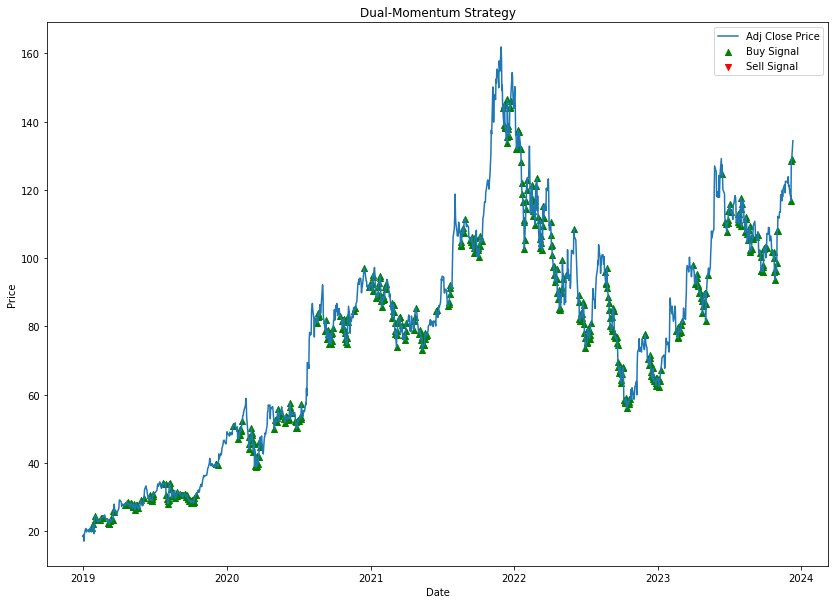

In [4]:
plt.figure(figsize=(14,10))
plt.plot(data.index,data['Adj Close'],label='Adj Close Price') 
plt.scatter(data[data['Signal']==1].index, data[data['Signal']==1]['Adj Close'], marker='^',color='green',label='Buy Signal')
plt.scatter(data[data['Signal']==-1].index,data[data['Signal']==-1]['Adj Close'],marker='v',color='r',label='Sell Signal')
plt.title('Dual-Momentum Strategy') 
plt.xlabel('Date')
plt.ylabel('Price') 
plt.legend()
plt.show() 

In [5]:
data['Signal'].value_counts() 

Signal
0    706
1    540
Name: count, dtype: int64

In [6]:
# Calculate strategy returns
strategy_returns = data['Strategy_Returns'].dropna().sum()

print(f"Dual-Momentum Strategy Returns: {strategy_returns:.2%}") 

Dual-Momentum Strategy Returns: 103.55%


### Concepts of Classic Time-Series Dual-Momentum Strategy when a threshold is given

In [7]:
df = yf.download('AMD',start=start,end=end) 

[*********************100%%**********************]  1 of 1 completed


In [8]:
long_term_window = 12   # months
min_profitability_threshold = 0.05  # 50%

Calculate long-term momentum by skipping most recent month

In [9]:
df['LT_Momentum'] = df['Adj Close'].pct_change(long_term_window).shift(1)

#### Generate Signals
Generate buy (1) and sell (0) signals based on momentum and profitability threshold 

In [10]:
df['Signal'] = 0

df.loc[df['LT_Momentum']>min_profitability_threshold,'Signal'] = 1

Plotting Buy Signals

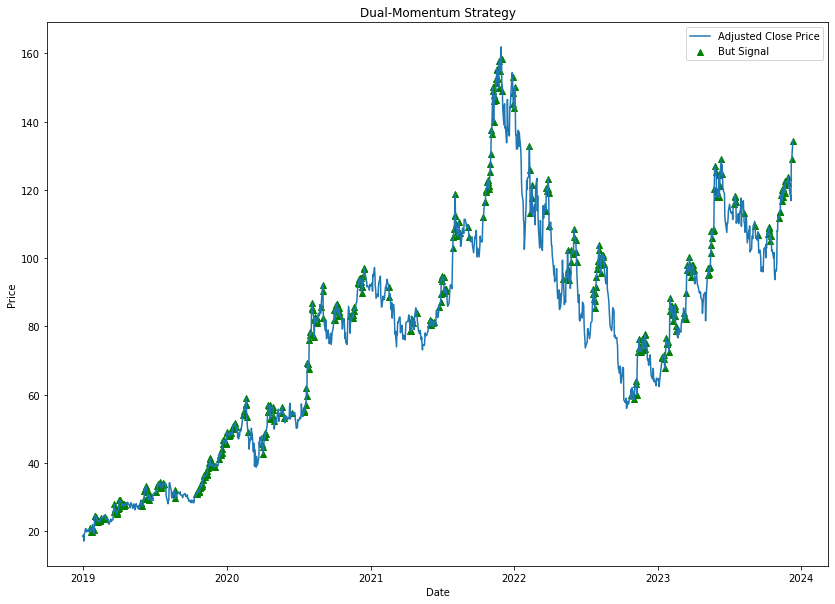

In [11]:
plt.figure(figsize=(14,10))
plt.plot(df.index,df['Adj Close'],label='Adjusted Close Price')
plt.scatter(df[df['Signal']==1].index,df[df['Signal']==1]['Adj Close'],marker='^',color='g',label='But Signal')
plt.title('Dual-Momentum Strategy') 
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend() 
plt.show() 

In [12]:
# Calculate strategy returns based on signals
df['Returns'] = df['Adj Close'].pct_change() 
df['Strategy_Returns'] = df['Signal'].shift(1) * df['Returns'] 

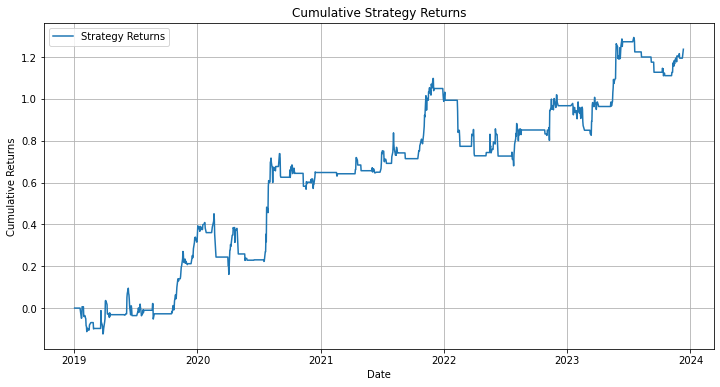

In [13]:
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Strategy_Returns'].cumsum(), label='Strategy Returns')
plt.title('Cumulative Strategy Returns')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.grid(True)
plt.legend()
plt.show()

In [14]:
df['Strategy_Returns_cumsum'] = df['Strategy_Returns'].cumsum()

In [15]:
df['Strategy_Returns_cumsum'].iloc[-1] 

1.2374473227511154

In [16]:
# Assuming df['Strategy Returns'] is already calculated
total_strategy_returns = df['Strategy_Returns'].sum()

print(f"Total Strategy Returns: {total_strategy_returns:.2%}") 

Total Strategy Returns: 123.74%


In [17]:
df['Strategy_Returns_cumsum'].max() 

1.2937954724777008

In [18]:
df['Strategy_Returns_cumsum'].min() 

-0.1237032929161096